**데이터 로드 및 전처리**

* CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
* 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용
* 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용
* 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [20]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=2023)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.





In [21]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.





C:\Users\sunw0506\AppData\Local\Temp\ipykernel_15208\2355943253.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


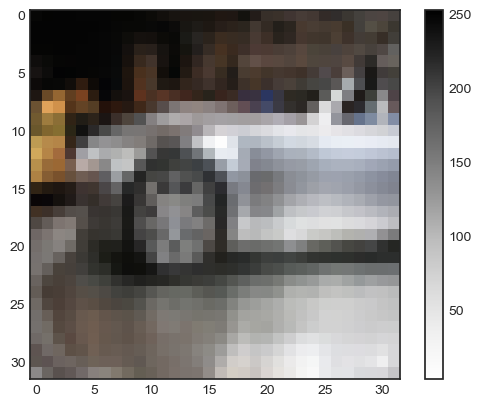

In [22]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [23]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.





In [24]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_val_reshaped = x_val.reshape(x_val.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [25]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [38]:
# 학습데이터 형상 변환
x_train_reshaped = x_train_reshaped.reshape(-1, 32, 32, 3)
x_val_reshaped = x_val_reshaped.reshape(-1, 32, 32, 3)
x_test_reshaped = x_test_reshaped.reshape(-1, 32, 32, 3)

**모델 구성 및 컴파일**
* BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.





In [33]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense





# 모델 구성
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


# 모델 컴파일
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

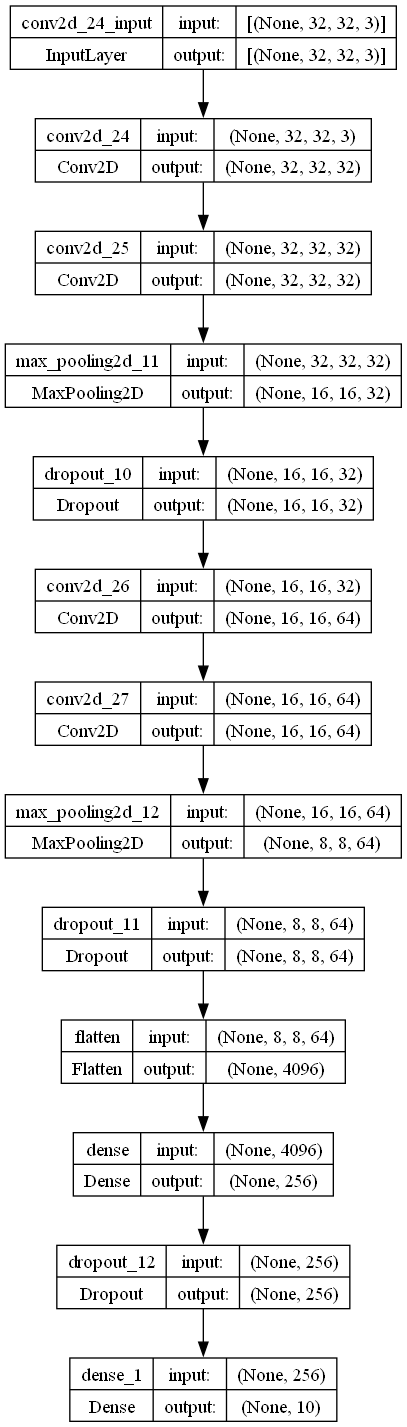

In [34]:
from tensorflow.keras import utils

utils.plot_model(model, show_shapes=True)

**모델 학습**
* ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.





In [35]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

check_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train_reshaped, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(x_val_reshaped, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 85s 66ms/step - loss: 2.1126 - accuracy: 0.3403 - val_loss: 1.4591 - val_accuracy: 0.4856
Epoch 2/100
   1/1250 [..............................] - ETA: 1:20 - loss: 1.7206 - accuracy: 0.4375

C:\Users\sunw0506\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 80s 64ms/step - loss: 1.4047 - accuracy: 0.4952 - val_loss: 1.2091 - val_accuracy: 0.5760
Epoch 3/100
1250/1250 [==============================] - 81s 65ms/step - loss: 1.2046 - accuracy: 0.5736 - val_loss: 1.1371 - val_accuracy: 0.5991
Epoch 4/100
1250/1250 [==============================] - 81s 65ms/step - loss: 1.0904 - accuracy: 0.6143 - val_loss: 0.9554 - val_accuracy: 0.6693
Epoch 5/100
1250/1250 [==============================] - 80s 64ms/step - loss: 1.0155 - accuracy: 0.6449 - val_loss: 0.9765 - val_accuracy: 0.6569
Epoch 6/100
1250/1250 [==============================] - 82s 66ms/step - loss: 0.9530 - accuracy: 0.6654 - val_loss: 0.9627 - val_accuracy: 0.6678
Epoch 7/100
1250/1250 [==============================] - 83s 66ms/step - loss: 0.9022 - accuracy: 0.6840 - val_loss: 0.8520 - val_accuracy: 0.7073
Epoch 8/100
1250/1250 [==============================] - 81s 65ms/step - loss: 0.8692 - accuracy: 0.6962 - val_loss: 0.8535 - val_

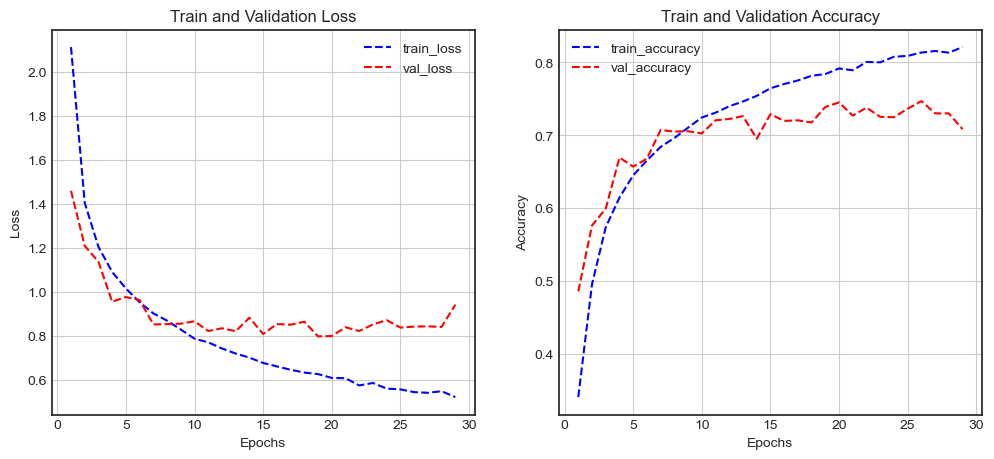

In [36]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1) # add_subplot 메서드를 사용하여 fig에 새로운 서브플롯(subplot)을 추가합니다. 이 서브플롯은 1x2 그리드의 첫 번째 위치에 배치됩니다. 결과적으로, 이 그림에는 두 개의 서브플롯이 옆으로 나란히 배치됩니다.
ax1.plot(epochs, loss, 'b--', label='train_loss') # plot 메서드를 사용하여 epochs를 x축으로, loss와 val_loss를 y축으로 하는 두 개의 선 그래프를 그립니다.
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid() # grid 메서드를 사용하여 그리드 라인을 추가합니다. 이는 그래프를 더 쉽게 읽을 수 있게 도와줍니다.
ax1.legend() # legend 메서드를 사용하여 범례를 추가, 범례는 plot 메서드에서 설정한 레이블을 사용

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend() 

plt.show()

**모델 평가 및 예측**


In [39]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test_reshaped, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8200 - accuracy: 0.7343


[0.8200355172157288, 0.7343000173568726]